In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
print(pd.__version__, np.__version__, sns.__version__)


2.2.2 1.26.4 0.13.2


In [92]:
iris_df = pd.read_csv("iris.csv") # stores the csv as a dataframe
print(iris_df.head()) # .head() shows first 5 rows
iris_df.shape


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


(150, 5)

In [93]:
# .describe() shows the basic stats
iris_df.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [94]:
iris_df.info() # basic datatype info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [95]:
iris_df['species'].value_counts() # counts the number of unique values in the species column
# hence gives the count of each species


species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [96]:
## DATA PREPROCESSING
# check for any null values
iris_df.isnull().sum() # .isnull() checks each element if its null, and .sum() adds up the resulting values in each column


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# EDA: EXPLORATORY DATA ANALYSIS
We use histograms, scatterplots to visualize data and understand their attributes.

Understanding manipulation of dataframes to handle data, use of subplot/hist/scatter to visualize data better.

<Axes: >

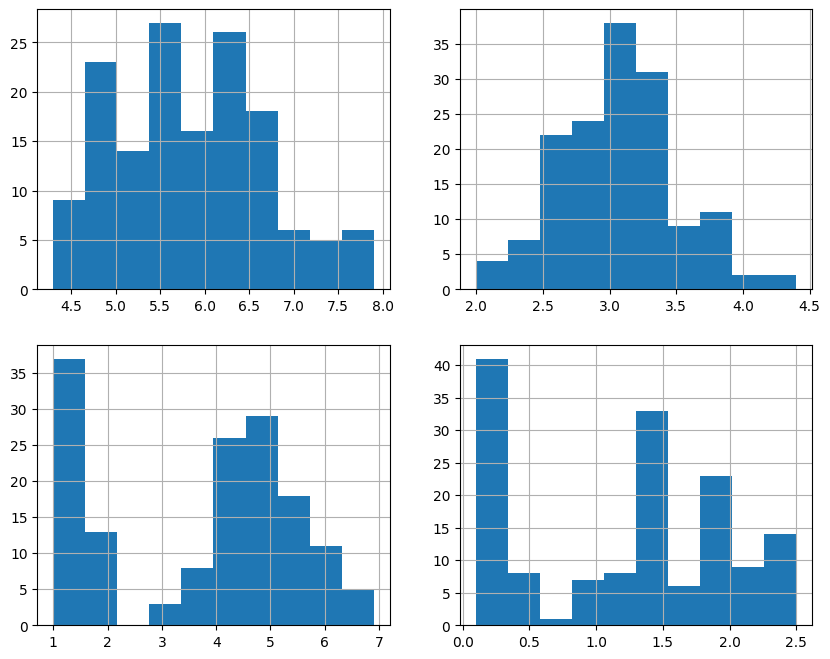

In [97]:

# 1. histograms for each column - feature?
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
iris_df["sepal_length"].hist()
plt.subplot(2,2,2)
iris_df["sepal_width"].hist()
plt.subplot(2,2,3)
iris_df["petal_length"].hist()
plt.subplot(2,2,4)
iris_df["petal_width"].hist()


In [191]:
# scatterplot
# three species, therefore a color for each
colors = ['blue', 'orange', 'red']
specs = ['setosa', 'versicolor', 'virginica']

# have to use pandas features to make it faster than iterating through all rows.
for i in range(3):
    # [x_base, y_base] = iris_df[iris_df['species']==specs[i]][['sepal_width', 'sepal_length']]
    # need not convert into lists, plt can plot series
    # iris_df[iris_df['species']==specs[i]] gives all the rows that follow the logical condition given inside.
    x_base = iris_df[iris_df['species']==specs[i]]['sepal_width'].to_list()
    y_base = iris_df[iris_df['species']==specs[i]]['sepal_length'].to_list()
    # plt.scatter(x_base, y_base,c = colors[i], label = specs[i])
    # plt.xlabel('sepal width')
    # plt.ylabel('sepal length')
    # plt.legend()



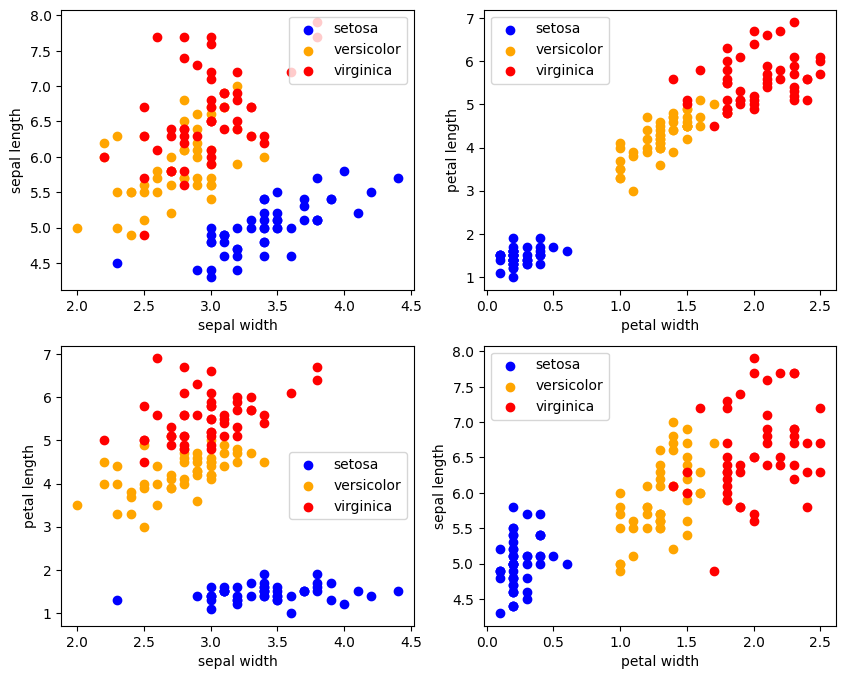

In [99]:
fig = plt.figure(figsize=(10, 8))
for i in range(3):
    x_base = iris_df[iris_df['species']==specs[i]]['sepal_width'].to_list()
    y_base = iris_df[iris_df['species']==specs[i]]['sepal_length'].to_list()
    plt.subplot(2, 2, 1)
    plt.scatter(x_base, y_base,c = colors[i], label = specs[i])
    plt.xlabel('sepal width')
    plt.ylabel('sepal length')
    plt.legend()

for i in range(3):
    x_base = iris_df[iris_df['species']==specs[i]]['petal_width'].to_list()
    y_base = iris_df[iris_df['species']==specs[i]]['petal_length'].to_list()
    plt.subplot(2, 2, 2)
    plt.scatter(x_base, y_base,c = colors[i], label = specs[i])
    plt.xlabel('petal width')
    plt.ylabel('petal length')
    plt.legend()

for i in range(3):
    x_base = iris_df[iris_df['species']==specs[i]]['sepal_width'].to_list()
    y_base = iris_df[iris_df['species']==specs[i]]['petal_length'].to_list()
    plt.subplot(2, 2, 3)
    plt.scatter(x_base, y_base,c = colors[i], label = specs[i])
    plt.xlabel('sepal width')
    plt.ylabel('petal length')
    plt.legend()

for i in range(3):
    x_base = iris_df[iris_df['species']==specs[i]]['petal_width'].to_list()
    y_base = iris_df[iris_df['species']==specs[i]]['sepal_length'].to_list()
    plt.subplot(2, 2, 4)
    plt.scatter(x_base, y_base,c = colors[i], label = specs[i])
    plt.xlabel('petal width')
    plt.ylabel('sepal length')
    plt.legend()


# Correlation Matrix


In [107]:
iris_df.drop(columns='species').corr() # drop the column with species names, and then find the correlation
# why does .describe() take the numeric columns- but .corr() takes this too?


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<Axes: >

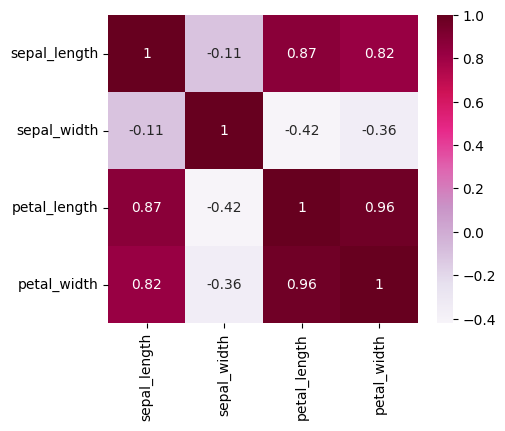

In [121]:
# heatmap for corr visualization
corr = iris_df.drop(columns='species').corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap='PuRd') # annot mentions the values in the heatmap
# ax=ax tells the heatmap to allign itself to the created axes
# plt.colormaps() to view all colormaps


# Label Encoding
Machines cant read 'sentosa', hence we need to covert into mumeric form before feeding it to the machine.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 


In [129]:
iris_df['species'] = le.fit_transform(iris_df['species'])
iris_df.head(8)
# this is preferred over manual mapping because inverse_transform() can be used for decoding
# which if done manually is tedious.
'''
fit() learns from data and encodes labels
transform() maps the labels to the encoded value
fit_transform() is used when learning & mapping is done from and to the same data
is we have seperate training data and testing data -> we need to apply both differently
'''


'\nfit() learns from data and encodes labels\ntransform() maps the labels to the encoded value\nfit_transform() is used when learning & mapping is done from and to the same data\nis we have seperate training data and testing data -> we need to apply both differently\n'

# Model Training
1. Divide the labelled data into test data and train data
2. Pick a model, train it, and test it's accuracy using test data.

In [185]:
from sklearn.model_selection import train_test_split
# X is going to be our parameters/features and Y is going to be our labels
X = iris_df.drop(columns='species')
Y = iris_df['species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)
# test_size tells how much percentage of the data are we going to use for testing


In [186]:
# choosing a model - logistic regression
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression()

# knn k-nearest neighbhours
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()

from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()


In [187]:
# model training
logistic_regression_model.fit(x_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [188]:
knn_model.fit(x_train, y_train)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [189]:
tree_model.fit(x_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [192]:
# performance metric
print("Accuracy (Logistic Regression Model): \n", logistic_regression_model.score(x_test, y_test)*100, "%")
print("Accuracy (knn Model): \n", knn_model.score(x_test, y_test)*100, "%")
print("Accuracy (Decision Tree Model): \n", tree_model.score(x_test, y_test)*100, "%")


Accuracy (Logistic Regression Model): 
 97.77777777777777 %
Accuracy (knn Model): 
 97.77777777777777 %
Accuracy (Decision Tree Model): 
 95.55555555555556 %
